In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import pylab

## Contents of Notebook

**Part 1: Water discharge validation**
- average water discharge (observed) is compared with average water discharge (simulated)
- mean daily water discharge (observed) is compared with mean daily water discharge (simulated)
- mean annual water discharge (observed) is cmpared with mean annual water discharge (simulated)

**Part 2: Compute average sediment discharge over reference scenario**
- Import sediment discharge records
- Take average and convert to mt/yr

## Part 1: Water discharge validation

### 1.1. Import Obs vs. Sim Data from Summary Statistics csvs

In [34]:
gfdl = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/reference/GFDL-ESM2M/REF_summ_stats_v3.csv'))
hadgem = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/reference/HadGEM2/REF_summ_stats_v3.csv'))
#ipsl = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/reference/IPSL_CM5A/REF_summ_stats_v3.csv'))
miroc = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/reference/MIROC-ESM-CHEM/REF_summ_stats_v3.csv'))
noresm = pd.DataFrame(pd.read_csv('../../setup/run_2/Ganga/reference/NORESM-M/REF_summ_stats_v3.csv'))

In [35]:
frames = [gfdl, hadgem, miroc, noresm]
concat = pd.concat(frames)

In [36]:
concat.insert(0, 'Model', ['GFDL-ESM2M', 'HadGEM2', 'MIROC-ESM-CHEM', 'NORESM-M'] )
concat

,Model,Mean Obs Qw,Mean Sim Qw,% Error,Mean Obs Qs,Mean Sim Qs,% Error.1,Max Obs Qw,Max Sim Qw,% Error.2,...,Max Sim Qs,% Error.3,Day Peak Qs Obs,Day Peak Qs Sim,CC Qw,Cov Qw,CC Qs,Cov Qs,Std Qw Obs,Std Qs Obs
0,GFDL-ESM2M,11036.6572,13017.698044,-17.949646,14391.362365,22684.610325,-57.626566,41997.163333,54659.961340,-30.151555,...,218505.969190,-217.534766,259,217,[[ 1. 0.64903316]\n [ 0.64903316 1. ...,[[ 2.26603539e+08 2.00728873e+08]\n [ 2.00...,[[ 1. 0.60767763]\n [ 0.60767763 1. ...,[[ 6.65621916e+08 3.22104413e+08]\n [ 3.22...,15052.66901,25798.471448
0,HadGEM2,11036.6572,12923.847573,-17.099293,14391.362365,22445.047922,-55.961940,41997.163333,59154.865820,-40.854432,...,339019.857777,-392.666593,259,189,[[ 1. 0.54472693]\n [ 0.54472693 1. ...,[[ 2.26603539e+08 2.27344314e+08]\n [ 2.27...,[[ 1. 0.50516471]\n [ 0.50516471 1. ...,[[ 6.65621916e+08 3.61342223e+08]\n [ 3.61...,15052.66901,25798.471448
0,MIROC-ESM-CHEM,11036.6572,11315.391707,-2.525534,14391.362365,21251.525675,-47.668616,41997.163333,53803.406457,-28.112001,...,216510.313511,-214.634662,259,228,[[ 1. 0.68551423]\n [ 0.68551423 1. ...,[[ 2.26603539e+08 1.87866175e+08]\n [ 1.87...,[[ 1. 0.63278576]\n [ 0.63278576 1. ...,[[ 6.65621916e+08 2.97214012e+08]\n [ 2.97...,15052.66901,25798.471448
0,NORESM-M,11036.6572,12311.476492,-11.550774,14391.362365,22004.115573,-52.898072,41997.163333,56232.339689,-33.895566,...,196689.211837,-185.830466,259,217,[[ 1. 0.63165303]\n [ 0.63165303 1. ...,[[ 2.26603539e+08 1.88783482e+08]\n [ 1.88...,[[ 1. 0.58091721]\n [ 0.58091721 1. ...,[[ 6.65621916e+08 2.97563814e+08]\n [ 2.97...,15052.66901,25798.471448


### 1.2. Plot Obs vs. Sim Mean and Maximum Qw

/opt/anaconda3/envs/pymt/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/opt/anaconda3/envs/pymt/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


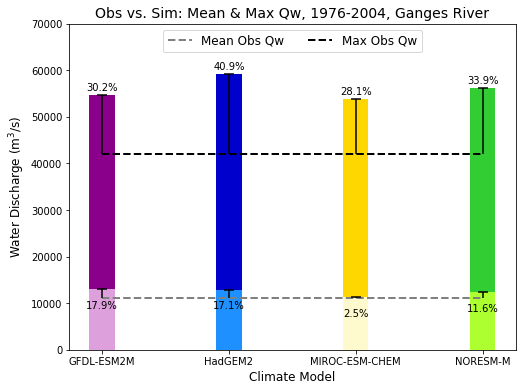

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

N = 4
ind = np.arange(N) # the x locations for the groups

models = ['GFDL-ESM2M', 'HadGEM2', 'MIROC-ESM-CHEM', 'NORESM-M']
max_error_labels = ['30.2%', '40.9%', '28.1%', '33.9%']
mean_error_labels = ['17.9%', '17.1%', '2.5%', '11.6%']
mean_error = [(gfdl['Mean Sim Qw'] - gfdl['Mean Obs Qw'], hadgem['Mean Sim Qw'] - hadgem['Mean Obs Qw'], miroc['Mean Sim Qw'] - miroc['Mean Obs Qw'], noresm['Mean Sim Qw'] - noresm['Mean Obs Qw']), (0,0,0,0)]
max_error = [(gfdl['Max Sim Qw'] - gfdl['Max Obs Qw'], hadgem['Max Sim Qw'] - hadgem['Max Obs Qw'], miroc['Max Sim Qw'] - miroc['Max Obs Qw'], noresm['Max Sim Qw'] - noresm['Max Obs Qw']), (0,0,0,0)]
max_bar_colors = ['darkmagenta', 'mediumblue', 'gold', 'limegreen']
mean_bar_colors = ['plum', 'dodgerblue', 'lemonchiffon', 'greenyellow']
obs_qw_mean = concat['Mean Obs Qw']
obs_qw_max = concat['Max Obs Qw']

fig, ax = plt.subplots(figsize = (8,6))
ax.plot(models, obs_qw_mean, color = 'grey', linewidth = 2, zorder=1, linestyle = 'dashed', label = 'Mean Obs Qw')
ax.plot(models, obs_qw_max, color = 'black', linewidth = 2, zorder = 1, linestyle = 'dashed', label = 'Max Obs Qw')
bar_max = ax.bar(models, concat['Max Sim Qw'], width = 0.2,  color = max_bar_colors)
bar_mean = ax.bar(models, concat['Mean Sim Qw'], width = 0.2,  color = mean_bar_colors)
ax.errorbar(models, concat['Max Sim Qw'], yerr = max_error, fmt = '_', linestyle='none', ecolor = 'black', elinewidth=1.5, marker = '_', markeredgewidth = 1.5, markersize = 10, markeredgecolor = 'black')
ax.errorbar(models, concat['Mean Sim Qw'], yerr = mean_error, fmt = '_', linestyle='none', ecolor = 'black', elinewidth=1.5, marker = '_', markeredgewidth = 1.5, markersize = 10, markeredgecolor = 'black')
ax.set_xlabel('Climate Model', size = 12)
ax.set_ylabel('Water Discharge (m$^3/$s)', size = 12)
ax.set_title('Obs vs. Sim: Mean & Max Qw, 1976-2004, Ganges River', size = 14)
ax.set_ylim(0, 70000)
ax.legend(loc = 'upper center', ncol = 4, prop={'size': 12})

rects1 = bar_max.patches
rects2 = bar_mean.patches

for rect, label in zip(rects1, max_error_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 500, label, ha='center', va='bottom')
    
for rect, label in zip(rects2, mean_error_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height - 4500, label, ha='center', va='bottom')
    
fig.savefig('../../figures/v2/validation/ganges_qw_mean_max_bars.png', size = 300)
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
plt.show()

### 1.3. Import daily simulated water discharge outputs

In [38]:
gfdl_qw = np.genfromtxt('../../setup/run_2/Ganga/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw = np.genfromtxt('../../setup/run_2/Ganga/reference/HadGEM2/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw = np.genfromtxt('../../setup/run_2/Ganga/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw = np.genfromtxt('../../setup/run_2/Ganga/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw = np.genfromtxt('../../setup/run_2/Ganga/reference/NORESM-M/Hydrotrend/HYDROASCII.Q', skip_header = True)   

### 1.4. Reshape Qw arrays: Mean Daily Discharge

In [39]:
gfdl_reshape_qw = gfdl_qw[0:-1].reshape(30, 365)
gfdl_mean_cols_qw = np.mean(gfdl_reshape_qw, axis = 0)

hadgem_reshape = hadgem_qw[0:-1].reshape(30, 365)
hadgem_mean_cols_qw = np.mean(hadgem_reshape, axis = 0)

ipsl_reshape_qw = ipsl_qw[0:-1].reshape(30, 365)
ipsl_mean_cols_qw = np.mean(ipsl_reshape_qw, axis = 0)

miroc_reshape_qw = miroc_qw[0:-1].reshape(30, 365)
miroc_mean_cols_qw = np.mean(miroc_reshape_qw, axis = 0)

noresm_reshape_qw = noresm_qw[0:-1].reshape(30, 365)
noresm_mean_cols_qw = np.mean(noresm_reshape_qw, axis = 0)

### 1.5. Reshape Qw arrays: Mean Annual Discharge

In [40]:
gfdl_reshape_qw = gfdl_qw[0:-1].reshape(30, 365)
gfdl_mean_rows_qw = np.mean(gfdl_reshape_qw, axis = 1)

hadgem_reshape_qw = hadgem_qw[0:-1].reshape(30, 365)
hadgem_mean_rows_qw = np.mean(hadgem_reshape_qw, axis = 1)

ipsl_reshape_qw = ipsl_qw[0:-1].reshape(30, 365)
ipsl_mean_rows_qw = np.mean(ipsl_reshape_qw, axis = 1)

miroc_reshape_qw = miroc_qw[0:-1].reshape(30, 365)
miroc_mean_rows_qw = np.mean(miroc_reshape_qw, axis = 1)

noresm_reshape_qw = noresm_qw[0:-1].reshape(30, 365)
noresm_mean_rows_qw = np.mean(noresm_reshape_qw, axis = 1)

### 1.6. Import daily observed water discharge outputs

In [9]:
obs_qw = pd.DataFrame(pd.read_csv('../../water_data/Ganges/Hardinge_Qw_1976-2006.csv'))
obs_qw = np.array(obs_qw['Discharge (m3/s)'])

In [10]:
# Reshape array (mean daily)
obs_qw_reshape = obs_qw.reshape(30, 365)
obs_qw_mean_cols = np.mean(obs_qw_reshape, axis = 0)

# Reshape array (mean annual)
obs_qw_reshape = obs_qw.reshape(30, 365)
obs_qw_mean_rows = np.mean(obs_qw_reshape, axis = 1)

### 1.7. Calculate goodness-of-fit standards

#### 1.7a) Root Mean Squared Error (RMSE)

In [11]:
# Write rmse function
def rmse(y, y_pred):
    return np.sqrt(np.nanmean(np.square(y - y_pred)))

In [41]:
# Rmse over entire dataset
print('RMSE (m^3/s):')
gfdl_rmse_qw = rmse(obs_qw, gfdl_qw[0:-1])
print('GFDL: {:.6}'.format(gfdl_rmse_qw))
hadgem_rmse_qw = rmse(obs_qw, hadgem_qw[0:-1])
print('HadGEM: {:.6}'.format(hadgem_rmse_qw))
ipsl_rmse_qw = rmse(obs_qw, ipsl_qw[0:-1])
print('IPSL: {:.6}'.format(ipsl_rmse_qw))
miroc_rmse_qw = rmse(obs_qw, miroc_qw[0:-1])
print('MIROC: {:.6}'.format(miroc_rmse_qw))
noresm_rmse_qw = rmse(obs_qw, noresm_qw[0:-1])
print('NORESM: {:.6}'.format(noresm_rmse_qw))

RMSE (m^3/s):
GFDL: 15493.0
HadGEM: 23009.5
IPSL: 31136.0
MIROC: 12972.6
NORESM: 15264.1


#### 1.7b) Mean Discrepancy Ratio

In [42]:
# Write mean discrepancy ratio function
def mdr(y_max, y_pred_max):
    return np.nanmean(y_pred_max/y_max)

First, reshape data arrays to get max discharge value for each year

In [43]:
# Simulated data
gfdl_reshape = gfdl_qw[0:-1].reshape(30, 365)
gfdl_max_rows_qw = np.max(gfdl_reshape, axis = 1)

hadgem_reshape = hadgem_qw[0:-1].reshape(30, 365)
hadgem_max_rows_qw = np.max(hadgem_reshape, axis = 1)

ipsl_reshape = ipsl_qw[0:-1].reshape(30, 365)
ipsl_max_rows_qw = np.max(ipsl_reshape, axis = 1)

miroc_reshape = miroc_qw[0:-1].reshape(30, 365)
miroc_max_rows_qw = np.max(miroc_reshape, axis = 1)

noresm_reshape = noresm_qw[0:-1].reshape(30, 365)
noresm_max_rows_qw = np.max(noresm_reshape, axis = 1)

In [44]:
# Observed data
obs_qw_reshape_qw = obs_qw.reshape(30, 365)
obs_max_rows_qw = np.max(obs_qw_reshape_qw, axis = 1)

In [45]:
# Calculate mean discrepancy ratio for annual peaks
print('Mean Discrepancy Ratio (Annual Peaks)')
gfdl_mdr_qw = mdr(obs_max_rows_qw, gfdl_max_rows_qw)
print('GFDL: {:.4}'.format(gfdl_mdr_qw))
hadgem_mdr_qw = mdr(obs_max_rows_qw, hadgem_max_rows_qw)
print('HadGEM: {:.4}'.format(hadgem_mdr_qw))
ipsl_mdr_qw = mdr(obs_max_rows_qw, ipsl_max_rows_qw)
print('IPSL: {:.4}'.format(ipsl_mdr_qw))
miroc_mdr_qw = mdr(obs_max_rows_qw, miroc_max_rows_qw)
print('MIROC: {:.4}'.format(miroc_mdr_qw))
noresm_mdr_qw = mdr(obs_max_rows_qw, noresm_max_rows_qw)
print('NORESM: {:.4}'.format(noresm_mdr_qw))

Mean Discrepancy Ratio (Annual Peaks)
GFDL: 1.514
HadGEM: 2.144
IPSL: 2.709
MIROC: 1.372
NORESM: 1.491


Second, take max 30 days of water discharge

In [17]:
# Simulated data
gfdl_reshape = gfdl_qw[0:-1].reshape(30, 365)
gfdl_reshape_sort = np.sort(gfdl_reshape, axis = 1)
gfdl_mdr = np.mean(gfdl_reshape_sort[:,-30:], axis = 1)

hadgem_reshape = hadgem_qw[0:-1].reshape(30, 365)
hadgem_reshape_sort = np.sort(hadgem_reshape, axis = 1)
hadgem_mdr = np.mean(hadgem_reshape_sort[:,-30:], axis = 1)

ipsl_reshape = ipsl_qw[0:-1].reshape(30, 365)
ipsl_reshape_sort = np.sort(ipsl_reshape, axis = 1)
ipsl_mdr = np.mean(ipsl_reshape_sort[:,-30:], axis = 1)

miroc_reshape = miroc_qw[0:-1].reshape(30, 365)
miroc_reshape_sort = np.sort(miroc_reshape, axis = 1)
miroc_mdr = np.mean(miroc_reshape_sort[:,-30:], axis = 1)

noresm_reshape = noresm_qw[0:-1].reshape(30, 365)
noresm_reshape_sort = np.sort(noresm_reshape, axis = 1)
noresm_mdr = np.mean(noresm_reshape_sort[:,-30:], axis = 1)

In [18]:
# Observed data
obs_qw_reshape_qw = obs_qw.reshape(30, 365)
obs_qw_reshape_sort = np.sort(obs_qw_reshape, axis = 1)
obs_qw_mdr = np.mean(obs_qw_reshape_sort[:,-30:], axis = 1)

In [19]:
# Calculate mean discrepancy ratio for annual 30 day peaks
print('Mean Discrepancy Ratio (Annual Peaks)')
gfdl_mdr_qw_30 = mdr(obs_qw_mdr, gfdl_mdr)
print('GFDL: {:.4}'.format(gfdl_mdr_qw_30))
hadgem_mdr_qw_30 = mdr(obs_qw_mdr, hadgem_mdr)
print('HadGEM: {:.4}'.format(hadgem_mdr_qw_30))
ipsl_mdr_qw_30 = mdr(obs_qw_mdr, ipsl_mdr)
print('IPSL: {:.4}'.format(ipsl_mdr_qw_30))
miroc_mdr_qw_30 = mdr(obs_qw_mdr, miroc_mdr)
print('MIROC: {:.4}'.format(miroc_mdr_qw_30))
noresm_mdr_qw_30 = mdr(obs_qw_mdr, noresm_mdr)
print('NORESM: {:.4}'.format(noresm_mdr_qw_30))

Mean Discrepancy Ratio (Annual Peaks)
GFDL: 1.455
HadGEM: 1.828
IPSL: 2.235
MIROC: 1.311
NORESM: 1.413


#### 1.7c) Nash-Sutcliffe Index (?)

In [60]:
# Write nsi function
def nsi(y, y_pred):
    return 1-((np.nansum(np.square(y - y_pred)))/(np.nansum(np.square(y - np.nanmean(y)))))

In [47]:
# Calculate nse
print('Nash Sutcliffe Index')
gfdl_nsi_qw = nsi(obs_qw, gfdl_qw[0:-1])
print('GFDL: {:.4}'.format(gfdl_nsi_qw))
hadgem_nsi_qw = nsi(obs_qw, hadgem_qw[0:-1])
print('HadGEM: {:.4}'.format(hadgem_nsi_qw))
ipsl_nsi_qw = nsi(obs_qw, ipsl_qw[0:-1])
print('IPSL: {:.4}'.format(ipsl_nsi_qw))
miroc_nsi_qw = nsi(obs_qw, miroc_qw[0:-1])
print('MIROC: {:.4}'.format(miroc_nsi_qw))
noresm_nsi_qw = nsi(obs_qw, noresm_qw[0:-1])
print('NORESM: {:.4}'.format(noresm_nsi_qw))

Nash Sutcliffe Index
GFDL: -0.05926
HadGEM: -1.336
IPSL: -3.278
MIROC: 0.2573
NORESM: -0.02819


#### 1.7d) Standard Deviation

In [61]:
# This code will be utilized in 1.8 plot
obs_qw_reshape_T = obs_qw_reshape.T
obs_qw_reshape_T

obs_qw_std = np.array(obs_qw_reshape_T).std(1)

#### 1.7e) Days in Flood Stage

In [48]:
# Average number of days in flood stage (simulated)
print('Mean # of days in flood stage')
gfdl_flood_qw = np.mean(sum(i > 20000 for i in gfdl_reshape.T))
print('GFDL: {:.3}'.format(gfdl_flood_qw))
hadgem_flood_qw = np.mean(sum(i > 20000 for i in hadgem_reshape.T))
print('HadGEM: {:.3}'.format(hadgem_flood_qw))
ipsl_flood_qw = np.mean(sum(i > 20000 for i in ipsl_reshape.T))
print('IPSL: {:.3}'.format(ipsl_flood_qw))
miroc_flood_qw = np.mean(sum(i > 20000 for i in miroc_reshape.T))
print('MIROC: {:.3}'.format(miroc_flood_qw))
noresm_flood_qw = np.mean(sum(i > 20000 for i in noresm_reshape.T))
print('NORESM: {:.3}'.format(noresm_flood_qw))

# Average number of days in flood stage (simulated)
obs_flood_qw = np.mean(sum(i > 20000 for i in obs_qw_reshape_T))
print('Obs: {:.3}'.format(obs_flood_qw))

Mean # of days in flood stage
GFDL: 84.0
HadGEM: 66.0
IPSL: 59.0
MIROC: 75.0
NORESM: 81.5
Obs: 81.7


#### 1.7f) Calculate mean discrepancy ratio for days in flood stage

In [50]:
print('Mean Discrepancy Ratio (Days in flood stage)')
gfdl_mdr_flood = mdr(obs_flood_qw, gfdl_flood_qw)
print('GFDL: {:.3}'.format(gfdl_mdr_flood))
hadgem_mdr_flood = mdr(obs_flood_qw, hadgem_flood_qw)
print('HadGEM: {:.3}'.format(hadgem_mdr_flood))
ipsl_mdr_flood = mdr(obs_flood_qw, ipsl_flood_qw)
print('IPSL: {:.3}'.format(ipsl_mdr_flood))
miroc_mdr_flood = mdr(obs_flood_qw, miroc_flood_qw)
print('MIROC: {:.3}'.format(miroc_mdr_flood))
noresm_mdr_flood = mdr(obs_flood_qw, noresm_flood_qw)
print('NORESM: {:.3}'.format(noresm_mdr_flood))

Mean Discrepancy Ratio (Days in flood stage)
GFDL: 1.03
HadGEM: 0.808
IPSL: 0.722
MIROC: 0.918
NORESM: 0.998


### 1.8. Plot Obs. Vs. Sim. Mean Daily Discharge

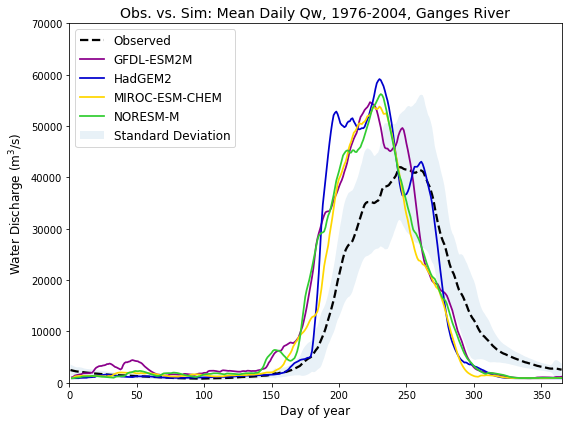

In [51]:
day_of_year = np.arange(1,366,1)

fig, ax = plt.subplots(figsize = (8, 6))
plt.plot(day_of_year, obs_qw_mean_cols, color = 'black', label = 'Observed', linewidth = 2.25, linestyle = '--')
plt.plot(day_of_year, gfdl_mean_cols_qw, color = 'darkmagenta', label = 'GFDL-ESM2M', linewidth = 1.75)
plt.plot(day_of_year, hadgem_mean_cols_qw, color = 'mediumblue', label = 'HadGEM2', linewidth = 1.75)
#plt.plot(day_of_year, ipsl_mean_cols_qw, color = 'mediumturquoise', label = 'IPSL_CM5A', linewidth = 1.75)
plt.plot(day_of_year, miroc_mean_cols_qw, color = 'gold', label = 'MIROC-ESM-CHEM', linewidth = 1.75)
plt.plot(day_of_year, noresm_mean_cols_qw, color = 'limegreen', label = 'NORESM-M', linewidth = 1.75)
plt.fill_between(day_of_year, obs_qw_mean_cols-obs_qw_std, obs_qw_mean_cols+obs_qw_std, alpha=.1, label = 'Standard Deviation')

plt.xlabel('Day of year', size = 12)
plt.ylabel('Water Discharge (m$^3/$s)', size = 12)
plt.title('Obs. vs. Sim: Mean Daily Qw, 1976-2004, Ganges River', size = 14)
plt.legend(loc = 2, prop={'size': 12})
plt.xlim(0,365)
plt.ylim(0,70000)

fig.tight_layout()
fig.savefig('../../figures/v2/validation/ganga_qw_daily_mean.png', size = 300)

plt.show()

### 1.9. Plot Obs. Vs. Sim. Mean Annual Discharge

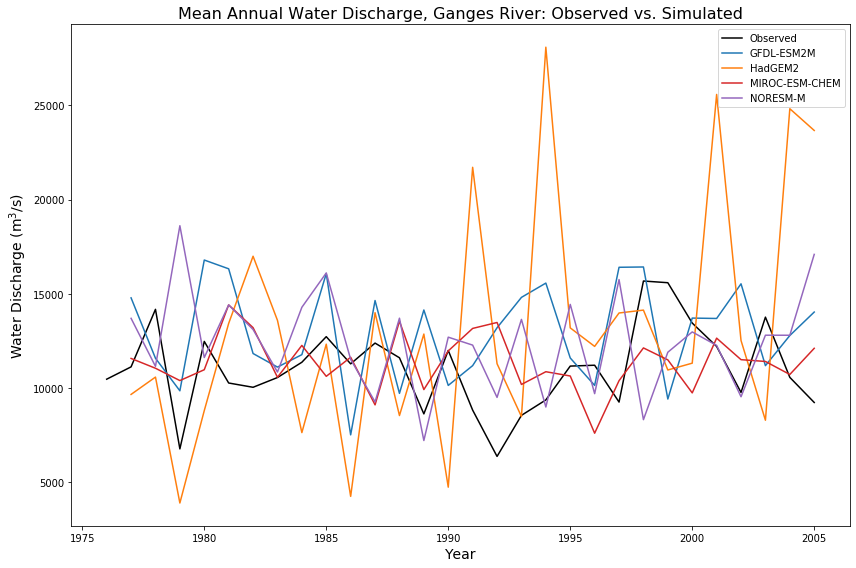

In [53]:
years = np.arange(1976, 2006, 1)

fig, ax = plt.subplots(figsize = (12, 8))
plt.plot(years, obs_qw_mean_rows, color = 'black', label = 'Observed')
plt.plot(years, gfdl_mean_rows_qw, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_mean_rows_qw, color = 'tab:orange', label = 'HadGEM2')
#plt.plot(years, ipsl_mean_rows_qw, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_mean_rows_qw, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_mean_rows_qw, color = 'tab:purple', label = 'NORESM-M')

plt.xlabel('Year', size = 14)
plt.ylabel('Water Discharge (m$^3/$s)', size = 14)
plt.title('Mean Annual Water Discharge, Ganges River: Observed vs. Simulated', size = 16)
plt.legend()

fig.tight_layout()
fig.savefig('../../figures/v2/validation/ganga_qw_annual_mean.png')

plt.show()

## Part 2: Compute average sediment discharge over reference scenario

### 2.1. Import daily simulated sediment discharge outputs

In [27]:
gfdl_qs = np.genfromtxt('../../setup/run_2/Ganga/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs = np.genfromtxt('../../setup/run_2/Ganga/reference/HadGEM2/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs = np.genfromtxt('../../setup/run_2/Ganga/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs = np.genfromtxt('../../setup/run_2/Ganga/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs = np.genfromtxt('../../setup/run_2/Ganga/reference/NORESM-M/Hydrotrend/HYDROASCII.QS', skip_header = True)   

### 2.4. Calculate annual average simulated sediment loads (sum method)

In [57]:
# Take average sediment discharge over output array
gfdl_qs_kgs = sum(gfdl_qs[1:10951])/10951
hadgem_qs_kgs = sum(hadgem_qs[1:10951])/10951
ipsl_qs_kgs = sum(ipsl_qs[1:10951])/10951
miroc_qs_kgs = sum(miroc_qs[1:10951])/10951
noresm_qs_kgs = sum(noresm_qs[1:10951])/10951

In [58]:
# Convert from kg/s to mt/yr
gfdl_qs_mtyr = gfdl_qs_kgs*3.14e7/1e9
hadgem_qs_mtyr = hadgem_qs_kgs*3.14e7/1e9
ipsl_qs_mtyr = ipsl_qs_kgs*3.14e7/1e9
miroc_qs_mtyr = miroc_qs_kgs*3.14e7/1e9
noresm_qs_mtyr = noresm_qs_kgs*3.14e7/1e9

In [59]:
# Print results
print('GFDL: {:.5}'.format(gfdl_qs_mtyr))
print('HadGEM: {:.5}'.format(hadgem_qs_mtyr))
print('IPSL: {:.5}'.format(ipsl_qs_mtyr))
print('MIROC: {:.5}'.format(miroc_qs_mtyr))
print('NORESM: {:.5}'.format(noresm_qs_mtyr))
print('Average: {:.5}'.format((gfdl_qs_mtyr + hadgem_qs_mtyr + miroc_qs_mtyr + noresm_qs_mtyr)/4))

GFDL: 712.23
HadGEM: 704.71
IPSL: 754.15
MIROC: 667.24
NORESM: 690.87
Average: 693.76
